# this is a file for checking the distance to land
* given (lat, lon) pair, we can identify its closest distance to land
  * the file is located at original 0.04-degree data set:
    * Docs: http://oceancolor.gsfc.nasa.gov/cms/DOCS/DistFromCoast
    * Sources: http://oceancolor.gsfc.nasa.gov/DOCS/DistFromCoast/dist2coast.txt.bz2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr

In [4]:
# take a look at the first ten lines of the file
!bzcat "./dist2land_data/dist2coast.txt.bz2" | head -10

-179.98	89.98	712.935
-179.94	89.98	712.934
-179.9	89.98	712.933
-179.86	89.98	712.932
-179.82	89.98	712.932
-179.78	89.98	712.931
-179.74	89.98	712.93
-179.7	89.98	712.929
-179.66	89.98	712.928
-179.62	89.98	712.927

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./dist2land_data/dist2coast.txt.bz2, output file = (stdout)


In [5]:
# the resolution is 0.01 degree, which is 1 km
dist_db = pd.read_csv("./dist2land_data/dist2coast.txt.bz2", header=None, sep='\t', names=['lon','lat','dist'])

In [6]:
dist_db.head()
#dist_db.columns = ['lon','lat','dist']

#make a copy for safety
dist_db_copy =dist_db

In [7]:
mask= dist_db_copy.lon<0
mask

0            True
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
            ...  
40499970    False
40499971    False
40499972    False
40499973    False
40499974    False
40499975    False
40499976    False
40499977    False
40499978    False
40499979    False
40499980    False
40499981    False
40499982    False
40499983    False
40499984    False
40499985    False
40499986    False
40499987    False
40499988    False
40499989    False
40499990    False
40499991    False
40499992    False
40499993    False
40499994  

In [8]:
dist_db_copy.lon[mask] = dist_db_copy.loc[mask].lon + 360
print('after processing, the minimum longitude is %f4.3 and maximum is %f4.3' % (dist_db_copy.lon.min(),dist_db_copy.lon.max()) )

after processing, the minimum longitude is 0.0200004.3 and maximum is 359.9800004.3


In [9]:
# reduce dataset 
# Select only the arabian sea region
arabian_sea = (dist_db_copy.lon > 45) & (dist_db_copy.lon< 75) & (dist_db_copy.lat> 5) & (dist_db_copy.lat <28)
dist_db_arabian = dist_db_copy[arabian_sea]
print('dist_db_copy.shape is %s, dist_db_arabian.shape is %s' % (dist_db_copy.shape, dist_db_arabian.shape) )

dist_db_copy.shape is (40500000, 3), dist_db_arabian.shape is (431250, 3)


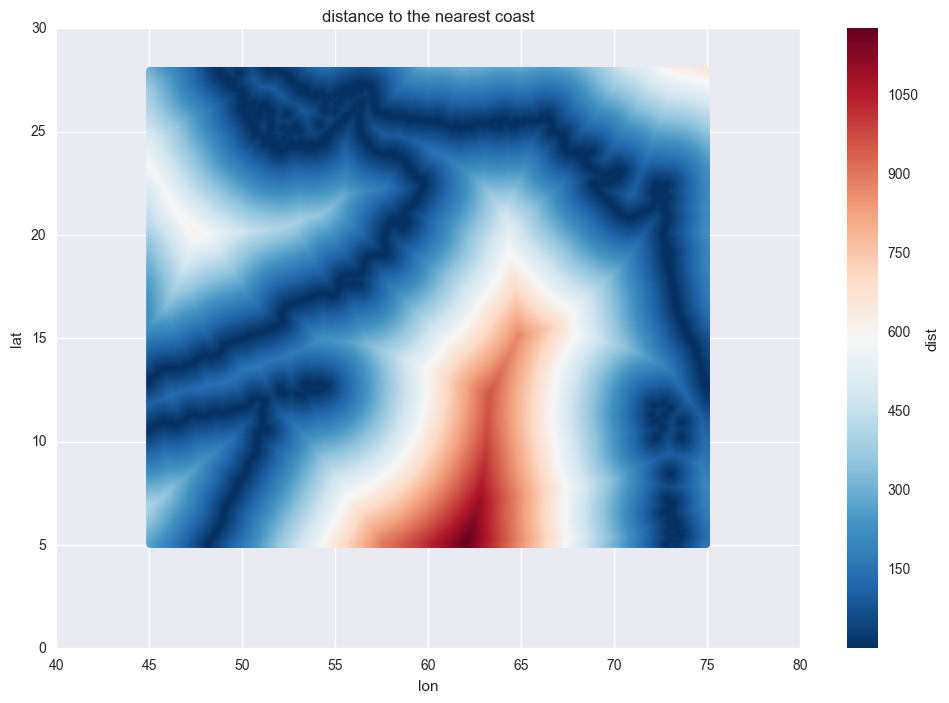

In [12]:
# visualize the unsigned(in-land & out-land) distance around global region
fig, ax  = plt.subplots(figsize=(12,8))
dist_db_arabian.plot(kind='scatter', x='lon', y='lat', c='dist', cmap='RdBu_r', edgecolor='none', ax=ax, title='distance to the nearest coast')

In [11]:
# transfer the dataframe into dataset, and to prepare for dataset.sel
dist_DS = xr.Dataset.from_dataframe(dist_db_arabian.set_index(['lon','lat']) ) # set time & id as the index); use reset_index to revert this operation
dist_DS

<xarray.Dataset>
Dimensions:  (lat: 575, lon: 750)
Coordinates:
  * lon      (lon) float64 45.02 45.06 45.1 45.14 45.18 45.22 45.26 45.3 ...
  * lat      (lat) float64 5.02 5.06 5.1 5.14 5.18 5.22 5.26 5.3 5.34 5.38 ...
Data variables:
    dist     (lon, lat) float64 280.4 283.3 286.3 289.3 292.3 295.3 298.3 ...

In [13]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
df_chl_out_2D = pd.read_csv('./data_collector_modisa_chla9km/df_chl_out_2D_modisa.csv',index_col='index')
df_chl_out_2D

,id,time,lon,ve,var_lon,var_tmp,vn,spd,var_lat,lat,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10
index,,,,,,,,,,,,,,,
15828,34721,2002-11-03,67.570000,3.303000,0.000135,0.001823,2.865500,8.211375,0.000069,12.647250,29.435500,0.123307,-0.909012,-0.010569,NaN
16081,34710,2002-11-05,63.160750,0.491500,0.000088,0.001596,10.219250,10.749875,0.000050,17.127000,28.991250,0.445077,-0.351565,0.033500,-1.474955
16320,11089,2002-11-07,64.835375,-15.401500,0.000105,0.003391,2.263500,16.392000,0.000056,14.366875,28.939625,0.182671,-0.738330,0.024246,-1.615360
16322,15707,2002-11-07,67.399125,-19.144750,0.000118,1000.000000,-21.695125,29.499000,0.000063,13.739500,NaN,0.161665,-0.791384,-0.004139,NaN
16336,34315,2002-11-07,57.375375,-49.749875,0.000085,0.004589,4.788500,52.729375,0.000048,5.613000,29.647125,0.115356,-0.937960,-0.009359,NaN
16340,34710,2002-11-07,63.170375,-0.728375,0.000148,0.001614,10.725375,11.110875,0.000075,17.297375,28.900250,0.376970,-0.423693,-0.068107,NaN
16579,11089,2002-11-09,64.586375,-14.547875,0.000189,0.004779,-3.024000,15.786125,0.000090,14.356250,29.047125,0.194167,-0.711825,0.011496,-1.939453
16581,15707,2002-11-09,67.213250,-5.045875,0.000183,1000.000000,-23.739500,24.623250,0.000089,13.350625,NaN,0.164932,-0.782695,0.003267,-2.485850
16605,34721,2002-11-09,67.965125,13.566000,0.000215,0.002024,1.321875,15.994875,0.000099,12.587500,29.499125,0.143538,-0.843033,-0.006717,NaN


In [ ]:
'''
# load the 2D data, based on the floats data and the lagrangian rate of change on chl_ocx
import pandas as pd
test = pd.read_hdf('df_chl_out_2D.h5')
test

# a check
list(test.groupby(['id']))
'''

In [14]:
# check the lat and lon
# df_chl_out_2D.lon
# df_chl_out_2D.lat

In [15]:
tmp_dist = dist_DS.dist.sel_points(lon=list(df_chl_out_2D.lon),lat=list(df_chl_out_2D.lat), method='nearest')
print('the count of nan vaues in tmpAll is',tmp_dist.to_series().isnull().sum())
tmp_dist.to_series()

the count of nan vaues in tmpAll is 0


points
0      514.4420
1      579.2250
2      855.6750
3      572.6910
4      824.3420
5      568.6320
6      878.5510
7      572.6400
8      470.1010
9      540.8280
10     866.4410
11     452.2190
12     848.3430
13     467.1530
14     520.5600
15     560.4820
16     204.7940
17     149.9980
18     201.5180
19     732.5160
20     215.2650
21     839.5940
22     741.0380
23     291.2670
24     550.8700
25     698.6280
26     399.2320
27     558.2770
28     356.4060
29     347.1890
         ...   
775    124.2240
776    842.6260
777    147.4100
778    947.0290
779    632.1170
780    902.8360
781    654.2140
782    655.4240
783    676.9840
784    664.6880
785    645.3280
786    719.9600
787    629.2100
788    865.5090
789    684.1940
790    860.9300
791    576.3870
792    575.3420
793    437.1820
794    577.8640
795    445.3440
796    584.7310
797     17.5207
798    577.7550
799    552.5030
800    838.9730
801    417.0810
802    414.2320
803    549.9370
804    661.8910
Name: dist, dtype

after editing the dataframe the nan values in 'chl_ocx' is 0


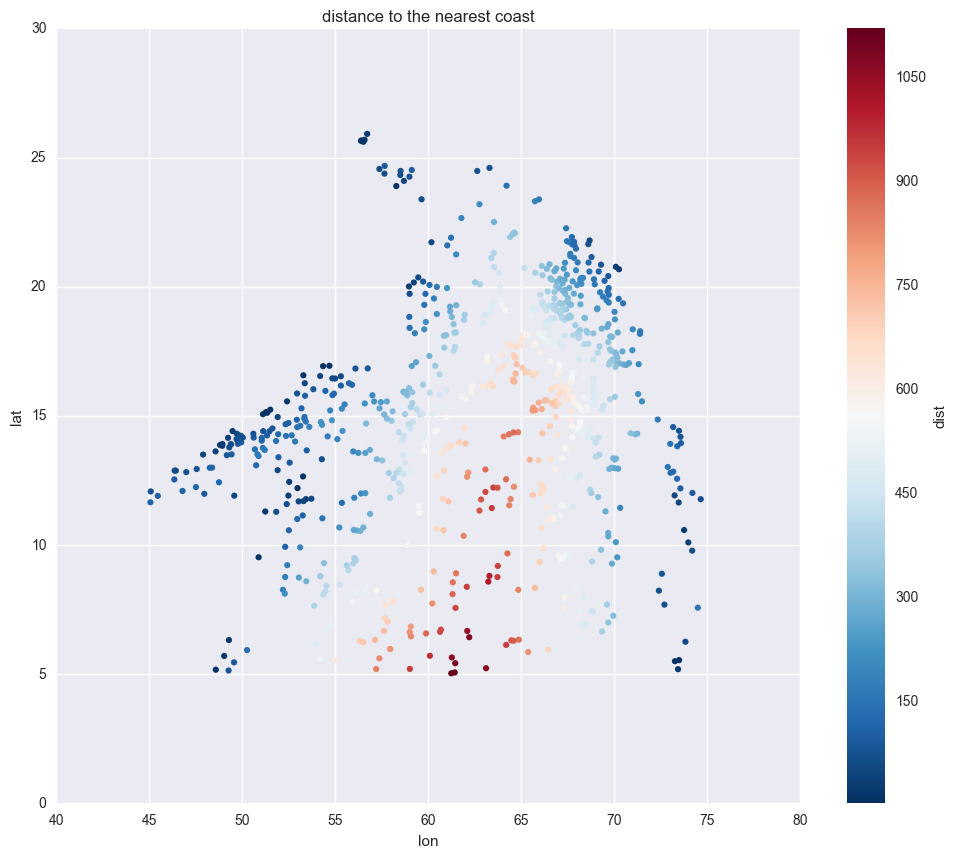

In [16]:
# tmp.to_series() to transfer it from xarray dataset to series
df_chl_out_2D['dist'] = pd.Series(np.array(tmp_dist.to_series()), index=df_chl_out_2D.index)
print("after editing the dataframe the nan values in 'chl_ocx' is",df_chl_out_2D.dist.isnull().sum() )  # they should be the same values as above

# take a look at the data
df_chl_out_2D

# visualize the float around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_2D.plot(kind='scatter', x='lon', y='lat', c='dist', cmap='RdBu_r', edgecolor='none', ax=ax, title = 'distance to the nearest coast')

In [17]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_2D_3.csv --  {lat, lon, temp, chlor_a, dist}
# 3 represents 3 features: {temp, chlor_a, dist}
df_chl_out_2D.to_csv('df_chl_out_2D_modisa_3.csv', sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv('df_chl_out_2D_modisa_3.csv', index_col='index')

# a check
test.head()

,id,time,lon,ve,var_lon,var_tmp,vn,spd,var_lat,lat,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
15828,34721,2002-11-03,67.570000,3.303000,0.000135,0.001823,2.865500,8.211375,0.000069,12.647250,29.435500,0.123307,-0.909012,-0.010569,NaN,514.442
16081,34710,2002-11-05,63.160750,0.491500,0.000088,0.001596,10.219250,10.749875,0.000050,17.127000,28.991250,0.445077,-0.351565,0.033500,-1.474955,579.225
16320,11089,2002-11-07,64.835375,-15.401500,0.000105,0.003391,2.263500,16.392000,0.000056,14.366875,28.939625,0.182671,-0.738330,0.024246,-1.615360,855.675
16322,15707,2002-11-07,67.399125,-19.144750,0.000118,1000.000000,-21.695125,29.499000,0.000063,13.739500,NaN,0.161665,-0.791384,-0.004139,NaN,572.691
16336,34315,2002-11-07,57.375375,-49.749875,0.000085,0.004589,4.788500,52.729375,0.000048,5.613000,29.647125,0.115356,-0.937960,-0.009359,NaN,824.342


In [18]:
# summary
# do a transformation to make the longitude positive
# transform the dataframe into dataset
# carry out the interpolation on dataset and transform it into a dataframe

# think about output the data from 2D interpolations as a binary file to save time
# 

In [19]:
from datetime import datetime, timedelta
datetime(2002, 1, 1) + timedelta(days=184)

datetime.datetime(2002, 7, 4, 0, 0)